In [8]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=15,10

In [9]:
url  = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto20/NumeroVentiladores_T.csv"
data = pd.read_csv(url)

In [10]:
data = data.rename(columns={"Ventiladores": "fecha"}) #Le cambiamos el nombre a la columna
data.tail()

,fecha,total,disponibles,ocupados
8,2020-04-22,1619,545,1074
9,2020-04-23,1622,536,1086
10,2020-04-24,1625,541,1084
11,2020-04-25,1630,572,1058
12,2020-04-26,1702,620,1082


## Gráfico de barras: Cantidad de ventiladores totales vs ocupados

In [11]:
def labelonbars(X, Y, color):
    n = len(X)
    for i in range (n):
        number = '{:,}'.format(int(Y[i])).replace(',', '.')
        plt.annotate(
            number, xy=(X[i], Y[i]),
            xytext =(0, -20),
            textcoords="offset points",
            ha ='center', va='bottom',
            color = color, weight='bold')

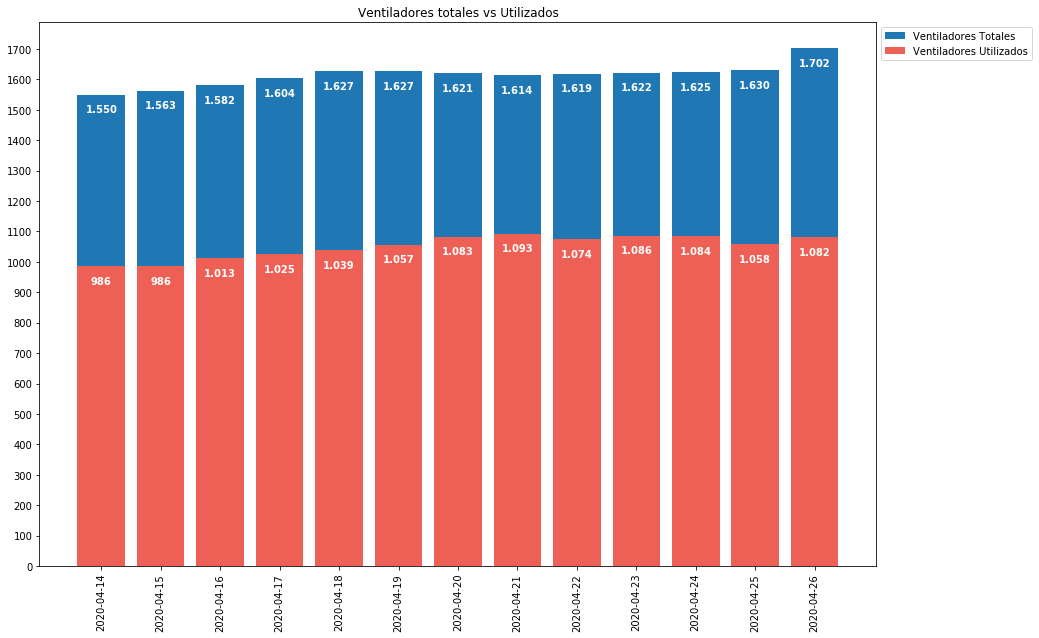

In [12]:
plt.bar(data["fecha"],data["total"])                          ##Ventiladores totales
plt.bar(data["fecha"],data["ocupados"], color = '#EE6055')    ##Ventiladores ocupados

labelonbars(data["fecha"],data["total"], 'white')
labelonbars(data["fecha"],data["ocupados"], 'white')

plt.legend(['Ventiladores Totales','Ventiladores Utilizados'], loc = 'best', bbox_to_anchor=(1.0, 1.0))
plt.xticks(data["fecha"], rotation='vertical')
plt.title("Ventiladores totales vs Utilizados")
plt.yticks(np.arange(0, max(data["total"])+1, 100))
plt.show()

## Gráfico de torta: Ventiladores utilizados vs disponibles

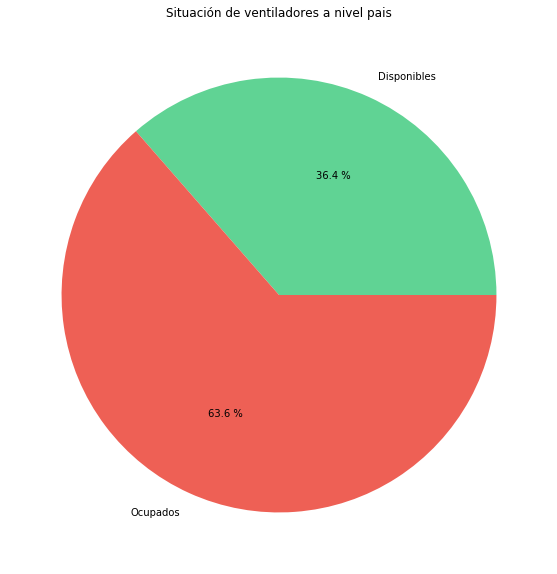

In [13]:
last_day = data.tail(1)
data_pie = last_day[last_day.columns[2::]].values
colores  = ["#60D394", "#EE6055"]
plt.pie(data_pie[0], labels = ["Disponibles", "Ocupados"], autopct="%0.1f %%", colors=colores)
plt.title("Situación de ventiladores a nivel pais")
plt.show()

## Gráfico de lineas: Ventiladores totales, disponibles y utilizados.

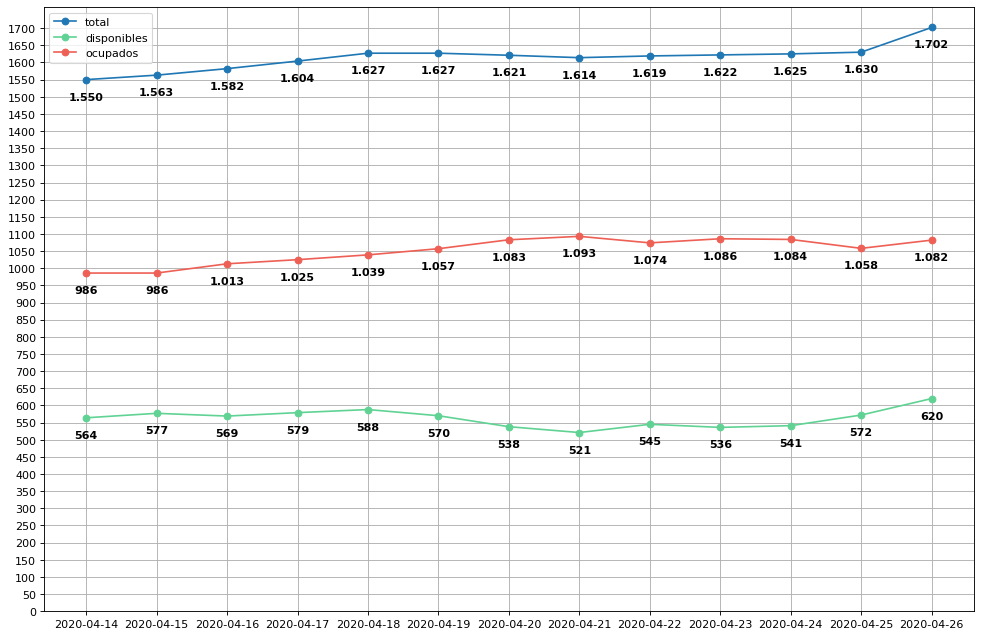

In [14]:
plt.figure(figsize=(15, 10), dpi=80)
plt.plot(data["fecha"], data["total"],       "o-")
plt.plot(data["fecha"], data["disponibles"], "o-", color = '#60D394')
plt.plot(data["fecha"], data["ocupados"],    "o-", color = '#EE6055')

labelonbars(data["fecha"], data["total"], 'black')
labelonbars(data["fecha"], data["disponibles"], 'black')
labelonbars(data["fecha"], data["ocupados"], 'black')

plt.yticks(np.arange(0, max(data["total"]), 50))
plt.legend(data.columns[1::])
plt.grid()
plt.show()